In [1118]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [1119]:
warnings.filterwarnings("ignore")

In [1120]:
data=pd.read_csv("adult.csv",header=None,sep=",\s")

In [1121]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [1122]:
data.shape

(32561, 15)

In [1123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [1124]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

data.columns = col_names

data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [1125]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [1126]:
cat_val=[var for var in data.columns if data[var].dtype=="O"]
cat_val

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [1127]:
data[cat_val].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [1128]:
data[cat_val].isna().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [1129]:
data.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [1130]:
data.workclass.replace("?",np.nan,inplace=True)
data.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [1131]:
data.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [1132]:
data.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [1133]:
data.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [1134]:
data.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [1135]:
data.occupation.replace("?",np.nan,inplace=True)

In [1136]:
data.relationship.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [1137]:
data.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [1138]:
data.sex.unique()

array(['Male', 'Female'], dtype=object)

In [1139]:
data.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [1140]:
data.native_country.replace("?",np.nan,inplace=True)

In [1141]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [1142]:
data[cat_val].isna().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [1143]:
num_val=[var for var in data.columns if data[var].dtype !="O"  ]
num_val

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [1144]:
data[num_val].isna().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [1145]:
X=data.drop("income",axis=1)
y=data["income"]

In [1146]:
from sklearn.model_selection import train_test_split

In [1147]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=47,shuffle=True)

In [1148]:
X_train.shape

(26048, 14)

In [1149]:
X_test.shape

(6513, 14)

In [1150]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [1151]:
cat_val_X_train=[var  for var in X_train.columns if X_train[var].dtypes=="O"]
cat_val_X_train

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [1152]:
num_val_X_train=[var  for var in X_train.columns if X_train[var].dtypes!="O"]
num_val_X_train

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [1153]:
df_cat_val_train=X_train[cat_val_X_train]

df_cat_val_test=X_test[cat_val_X_train]

In [1154]:
from sklearn.impute import SimpleImputer
import pandas as pd

model_impute = SimpleImputer(strategy="most_frequent")
df_cat_val_train = model_impute.fit_transform(df_cat_val_train)
df_cat_val_test = model_impute.transform(df_cat_val_test)

df_cat_val_train = pd.DataFrame(df_cat_val_train, columns=cat_val_X_train)
df_cat_val_test = pd.DataFrame(df_cat_val_test, columns=cat_val_X_train)



In [1155]:
# df_cat_val_test=pd.DataFrame(df_cat_val_test,columns=cat_val_X_train)
# df_cat_val_train=pd.DataFrame(df_cat_val_train,columns=cat_val_X_train)

In [1156]:
df_cat_val_train

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
1,Private,Assoc-acdm,Divorced,Machine-op-inspct,Not-in-family,White,Male,United-States
2,Private,7th-8th,Married-civ-spouse,Other-service,Husband,White,Male,United-States
3,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...
26043,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Male,United-States
26044,Private,HS-grad,Never-married,Sales,Own-child,White,Female,United-States
26045,Self-emp-not-inc,Some-college,Never-married,Craft-repair,Own-child,White,Male,United-States
26046,Self-emp-not-inc,10th,Never-married,Farming-fishing,Own-child,White,Male,United-States


In [1157]:
df_cat_val_test

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
1,Private,Bachelors,Divorced,Exec-managerial,Unmarried,Black,Female,United-States
2,Private,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States
3,Private,Some-college,Never-married,Sales,Not-in-family,White,Female,United-States
4,Private,12th,Divorced,Transport-moving,Not-in-family,White,Female,United-States
...,...,...,...,...,...,...,...,...
6508,Private,11th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
6509,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
6510,Self-emp-not-inc,Assoc-voc,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States
6511,Federal-gov,Some-college,Divorced,Adm-clerical,Not-in-family,White,Male,United-States


In [1158]:
df_cat_val_train.isna().sum()


workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [1159]:
df_cat_val_test.isna().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [1160]:
df_num_train=X_train[num_val_X_train]
df_num_test=X_test[num_val_X_train]

In [1161]:
from sklearn.preprocessing import RobustScaler
robustMoel=RobustScaler()
df_num_train=robustMoel.fit_transform(df_num_train)
df_num_test=robustMoel.transform(df_num_test)

In [1162]:
df_num_train=pd.DataFrame(df_num_train,columns=[num_val_X_train])
df_num_test=pd.DataFrame(df_num_test,columns=[num_val_X_train])

In [1163]:
# X_train = pd.concat([df_num_train, df_cat_val_train], axis = 1)

# # Combine numeric and categorical in test
# X_test = pd.concat([df_num_test, df_cat_val_test], axis = 1)

In [1164]:
import category_encoders as ce
encoder=ce.OneHotEncoder()
df_cat_val_train=encoder.fit_transform(df_cat_val_train)
df_cat_val_test=encoder.transform(df_cat_val_test)

In [1165]:
df_cat_val_test


,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,education_1,education_2,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6510,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6511,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1166]:
df_cat_val_train

,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,education_1,education_2,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26044,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26045,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26046,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1167]:
X_train=pd.concat([df_num_train,df_cat_val_train],axis=1)
X_test=pd.concat([df_num_test,df_cat_val_test],axis=1)

In [1168]:
X_train.isna().sum()

(age,)               0
(fnlwgt,)            0
(education_num,)     0
(capital_gain,)      0
(capital_loss,)      0
                    ..
native_country_37    0
native_country_38    0
native_country_39    0
native_country_40    0
native_country_41    0
Length: 105, dtype: int64

In [1169]:
X_test.isna().sum()

(age,)               0
(fnlwgt,)            0
(education_num,)     0
(capital_gain,)      0
(capital_loss,)      0
                    ..
native_country_37    0
native_country_38    0
native_country_39    0
native_country_40    0
native_country_41    0
Length: 105, dtype: int64

In [1170]:
col_name_train=X_train.columns
col_name_train

Index([           ('age',),         ('fnlwgt',),  ('education_num',),
         ('capital_gain',),   ('capital_loss',), ('hours_per_week',),
             'workclass_1',       'workclass_2',       'workclass_3',
             'workclass_4',
       ...
       'native_country_32', 'native_country_33', 'native_country_34',
       'native_country_35', 'native_country_36', 'native_country_37',
       'native_country_38', 'native_country_39', 'native_country_40',
       'native_country_41'],
      dtype='object', length=105)

In [1171]:
from sklearn.preprocessing import Normalizer
normalizerMOdel=Normalizer()
X_train=normalizerMOdel.fit_transform(X_train)
X_test=normalizerMOdel.transform(X_test)

In [1172]:
X_train=pd.DataFrame(X_train,columns=[col_name_train])
X_test=pd.DataFrame(X_test,columns=[col_name_train])

In [1173]:
X_train

,"(age,)","(fnlwgt,)","(education_num,)","(capital_gain,)","(capital_loss,)","(hours_per_week,)",workclass_1,workclass_2,workclass_3,workclass_4,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.190864,0.012759,0.000000,0.0,0.000000,0.000000,0.347025,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.050710,-0.179735,0.225380,0.0,0.000000,0.000000,0.338069,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.283392,-0.203190,-0.354240,0.0,0.000000,-0.708480,0.177120,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.000170,-0.000122,-0.000162,0.0,0.999999,0.000000,0.000486,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.079927,0.271478,0.319707,0.0,0.000000,0.000000,0.319707,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,-0.220300,0.140382,-0.086392,0.0,0.000000,-0.622025,0.259177,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26044,-0.189745,-0.046231,-0.066577,0.0,0.000000,-0.798927,0.199732,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26045,-0.049958,0.002855,0.000000,0.0,0.000000,-0.913513,0.000000,0.142736,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26046,-0.284774,0.200745,-0.399683,0.0,0.000000,0.000000,0.000000,0.299762,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1174]:
from sklearn.naive_bayes import GaussianNB
naive_guussian=GaussianNB()

In [1175]:
from sklearn.model_selection import GridSearchCV
parm_Grid={"var_smoothing":np.logspace(0,-9,num=100)}
gridmodel=GridSearchCV(estimator=naive_guussian,param_grid=parm_Grid,scoring="accuracy",cv=5,verbose=-1)
gridmodel.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=-1)

In [1176]:
print("best_params_ ",gridmodel.best_params_)

best_params_  {'var_smoothing': 0.2848035868435802}


In [1177]:
print("best_estimator_ ",gridmodel.best_estimator_)

best_estimator_  GaussianNB(var_smoothing=0.2848035868435802)


In [1178]:
best_na=gridmodel.best_estimator_
best_na

GaussianNB(var_smoothing=0.2848035868435802)

In [1179]:
y_pred=best_na.predict(X_test)

In [1180]:
from sklearn.metrics import accuracy_score,classification_report
print(f"accuracy {accuracy_score(y_test,y_pred)}")


accuracy 0.814985413787809


In [1181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88      4946
        >50K       0.62      0.60      0.61      1567

    accuracy                           0.81      6513
   macro avg       0.75      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



In [1182]:
print("training accuraccy,",best_na.score(X_train,y_train))

training accuraccy, 0.809543918918919


In [1183]:
print("testing accuraccy,",best_na.score(X_test,y_test))

testing accuraccy, 0.814985413787809


In [1184]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4366  580]
 [ 625  942]]

True Positives(TP) =  4366

True Negatives(TN) =  942

False Positives(FP) =  580

False Negatives(FN) =  625


<AxesSubplot:>

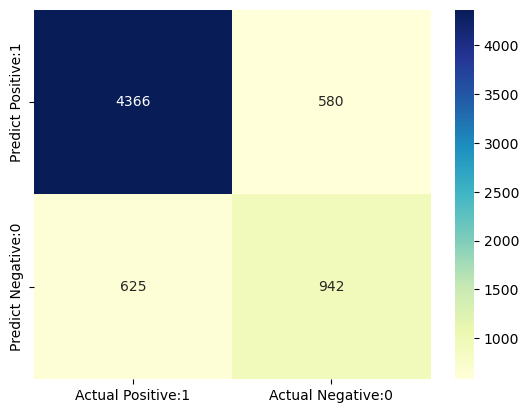

In [1185]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')